Shape: (1797, 64)


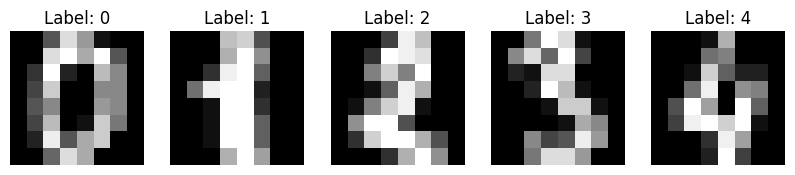

In [5]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

print("Shape:", X.shape)  # (1797, 64)

# Визуализация первых цифр
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression baseline
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)

print("LogReg Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


LogReg Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [7]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("RandomForest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))


RandomForest Accuracy: 0.9694444444444444


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:22:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9666666666666667


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Преобразуем данные в тензоры
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(X_train_t, y_train_t)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

# Простая сеть: вход (64) → скрытый слой (128) → выход (10 классов)
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.layers(x)

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение
for epoch in range(10):
    for xb, yb in train_dl:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Оценка
with torch.no_grad():
    preds_test = model(X_test_t)
    acc = (preds_test.argmax(dim=1) == y_test_t).float().mean()
    print("Neural Network Accuracy:", acc.item())


Epoch 1, Loss: 0.8037
Epoch 2, Loss: 0.5030
Epoch 3, Loss: 0.1369
Epoch 4, Loss: 0.1682
Epoch 5, Loss: 0.1163
Epoch 6, Loss: 0.1295
Epoch 7, Loss: 0.1358
Epoch 8, Loss: 0.1509
Epoch 9, Loss: 0.0401
Epoch 10, Loss: 0.0379
Neural Network Accuracy: 0.9777777791023254
